In [1]:
import time
import pickle

import numpy as np
import random

%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from utils import *
from q_learning import *

In [2]:
# Configurations
save_stats = True
save_figs = True
train = True
load = not train

seed = 0

## 2. Q-Learning

In [3]:
env = TictactoeEnv()

# Hyper-parameters
alpha = 0.05    # Learning rate
gamma = 0.99    # Discount factor
epsilon_opt = 0.5   # Optimal player's epsilon
num_episodes = 20000 # number of episodes
num_avg = 10 # training runs
test_freq = 250

### 2.1 Learning from experts

#### Question 1: Average reward with $\epsilon = 0.1$

epsilon_exploration_Q1 = 0.1 : 	M_opt =  0.0 	M_rand =  0.838


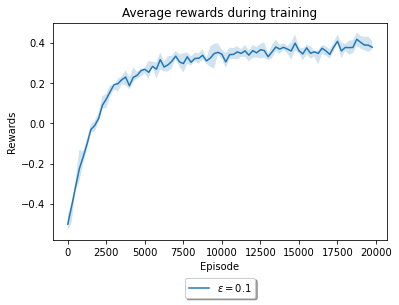

In [12]:
np.random.seed(seed)
random.seed(seed)
epsilon_exploration = 0.1
stats_dict_list = []
if train:
    for i in range(num_avg):
        print('************** RUN', i+1, 'OF', num_avg, '**************')
        stats_dict = {}
        start = time.time()
        Q, stats = q_learning(env, epsilon_exploration=epsilon_exploration, num_episodes=num_episodes, verbose=False, against_opt=True)
        M_opt = measure_performance(QPlayer(Q=Q), OptimalPlayer(epsilon=0.))
        M_rand = measure_performance(QPlayer(Q=Q), OptimalPlayer(epsilon=1.))
        print("M_opt =", M_opt)
        print("M_rand =", M_rand)
        stats_dict.update({epsilon_exploration: (stats, M_opt, M_rand)})
        stats_dict_list.append(stats_dict)
        print('RUN', i+1, 'took', np.round(time.time()-start,decimals=1), 'seconds')
    # Saving the results
    if save_stats:
        output_folder = os.path.join(os.getcwd(), 'results')
        os.makedirs(output_folder, exist_ok=True)
        fname = output_folder + '/Q1.pkl'
        with open(fname, 'wb') as handle:
            pickle.dump(stats_dict_list, handle, protocol=pickle.HIGHEST_PROTOCOL)

if load:
    output_folder = os.path.join(os.getcwd(), 'results')
    fname = output_folder + '/Q1.pkl'
    with open(fname, 'rb') as handle:
        stats_dict_list = pickle.load(handle)

plot_stats(stats_dict_list, [epsilon_exploration], 'epsilon_exploration_Q1', '\epsilon', save=save_figs, keys = ['rewards'], perc=True)

#### Questions 2 and 3: Decreasing exploration for different values of $n^{*}$

In [13]:
test_freq = 250
epsilon_min = 0.1
epsilon_max = 0.8
vec_n_star = np.hstack((np.array([1, 100, 500, 750]), np.round(np.logspace(3, np.log10(40000), 16))))

In [14]:
vec_n_star_first = vec_n_star[:10]
var_name = 'nstar_first'
q_learning_params_list = []
for n_star in vec_n_star_first:
    params = {'env': env,
              'num_episodes': num_episodes,
              'epsilon_exploration_rule': return_lambda_explor(epsilon_min, epsilon_max, n_star),
              'test_freq': test_freq,
              'against_opt': True}
    q_learning_params_list.append(params)

In [15]:
if train:
    stats_dict_nstar_first_list = train_avg(var_name, vec_n_star_first, q_learning_params_list, num_avg=num_avg, save_stats=save_stats)

In [16]:
var_name = 'nstar_second'
vec_n_star_second = vec_n_star[10:]
q_learning_params_list = []
for n_star in vec_n_star_second:
    params = {'env': env,
              'num_episodes': num_episodes,
              'epsilon_exploration_rule': return_lambda_explor(epsilon_min, epsilon_max, n_star),
              'test_freq': test_freq,
              'against_opt': True}
    q_learning_params_list.append(params)

In [17]:
if train:
    stats_dict_nstar_second_list = train_avg(var_name, vec_n_star_second, q_learning_params_list, num_avg=num_avg, save_stats=save_stats)

In [18]:
# Merge
if save_stats:
    stats_dict_nstar_list = []
    output_folder = os.path.join(os.getcwd(), 'results')
    os.makedirs(output_folder, exist_ok=True)
    fname = output_folder + '/stats_dict_nstar_first_list.pkl'
    with open(fname, 'rb') as handle:
        stats_dict_nstar_first_list = pickle.load(handle)
    fname = output_folder + '/stats_dict_nstar_second_list.pkl'
    with open(fname, 'rb') as handle:
        stats_dict_nstar_second_list = pickle.load(handle)
        for i in range(len(stats_dict_nstar_second_list)):
            stats_dict_nstar_list.append({**stats_dict_nstar_first_list[i], **stats_dict_nstar_second_list[i]})
    fname = output_folder + '/stats_dict_nstar_list.pkl'
    with open(fname, 'wb') as handle:
        pickle.dump(stats_dict_nstar_list, handle, protocol=pickle.HIGHEST_PROTOCOL)

n_star = 1.0 : 	M_opt =  0.0 	M_rand =  0.833
n_star = 9146.0 : 	M_opt =  0.0 	M_rand =  0.892
n_star = 19127.0 : 	M_opt =  0.0 	M_rand =  0.896
n_star = 40000 : 	M_opt =  -0.047 	M_rand =  0.821


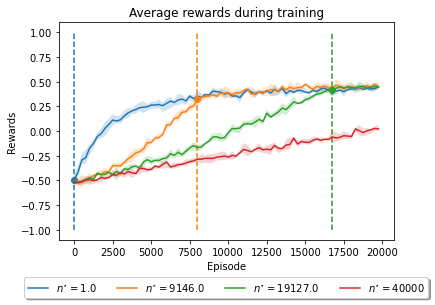

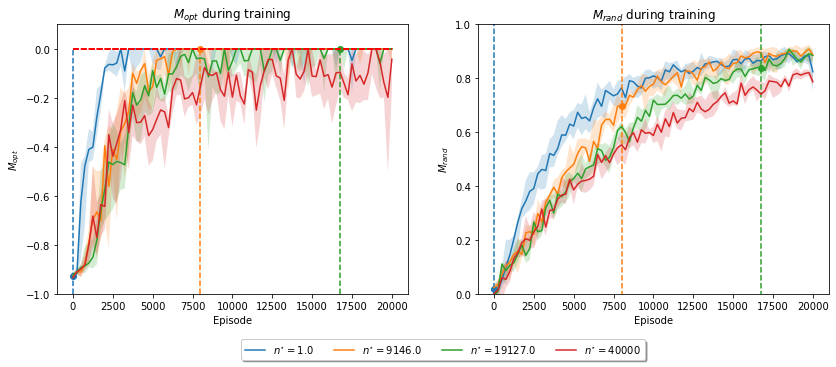

In [25]:
if load:
    output_folder = os.path.join(os.getcwd(), 'results')
    os.makedirs(output_folder, exist_ok=True)
    fname = output_folder + '/stats_dict_nstar_list.pkl'
    with open(fname, 'rb') as handle:
        stats_dict_nstar_list = pickle.load(handle)

plot_n_star = [1., 9146., 19127., 40000]
plot_stats(stats_dict_nstar_list, plot_n_star, 'n_star', "n^{\star}", save=save_figs, decaying_exploration=True, perc=True)

##### Plot for all the experimented values

n_star = 1.0 : 	M_opt =  0.0 	M_rand =  0.833
n_star = 100.0 : 	M_opt =  0.0 	M_rand =  0.891
n_star = 500.0 : 	M_opt =  0.0 	M_rand =  0.912
n_star = 750.0 : 	M_opt =  0.0 	M_rand =  0.898
n_star = 1000.0 : 	M_opt =  0.0 	M_rand =  0.897
n_star = 1279.0 : 	M_opt =  0.0 	M_rand =  0.889
n_star = 1635.0 : 	M_opt =  0.0 	M_rand =  0.907
n_star = 2091.0 : 	M_opt =  0.0 	M_rand =  0.902
n_star = 2674.0 : 	M_opt =  0.0 	M_rand =  0.893
n_star = 3420.0 : 	M_opt =  0.0 	M_rand =  0.848
n_star = 4373.0 : 	M_opt =  0.0 	M_rand =  0.897
n_star = 5593.0 : 	M_opt =  0.0 	M_rand =  0.905
n_star = 7152.0 : 	M_opt =  0.0 	M_rand =  0.885
n_star = 9146.0 : 	M_opt =  0.0 	M_rand =  0.892
n_star = 11696.0 : 	M_opt =  0.0 	M_rand =  0.891
n_star = 14957.0 : 	M_opt =  0.0 	M_rand =  0.884
n_star = 19127.0 : 	M_opt =  0.0 	M_rand =  0.896
n_star = 24460.0 : 	M_opt =  0.0 	M_rand =  0.837
n_star = 31279.0 : 	M_opt =  -0.034 	M_rand =  0.838
n_star = 40000.0 : 	M_opt =  -0.047 	M_rand =  0.821


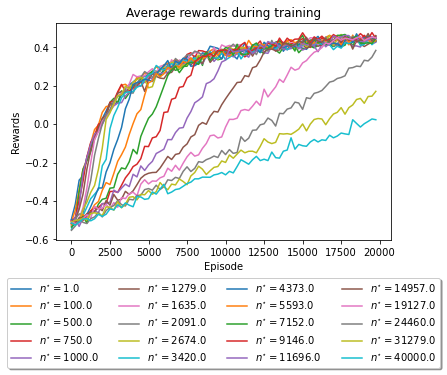

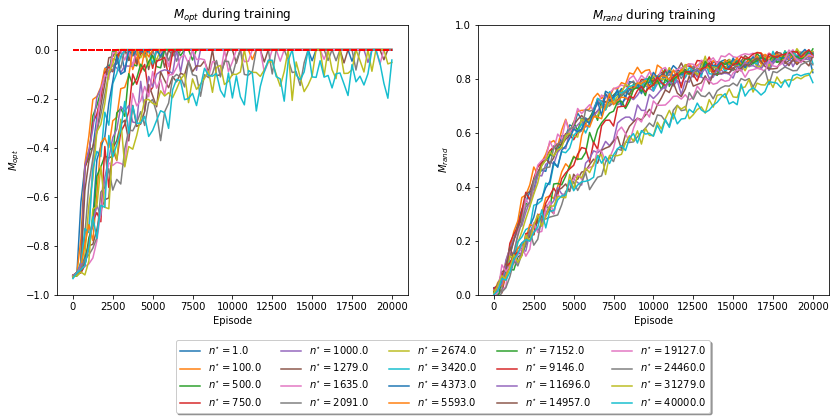

In [21]:
plot_stats(stats_dict_nstar_list, vec_n_star, 'n_star', "n^{\star}", save=False)

#### Questions 4: Good experts and bad experts

In [35]:
n_star = 9146 # we pick the best according to previous experiments
M = 11
var_name = 'epsilon_opt'
vec_epsilon_opt = np.round(np.linspace(0, 1, M), decimals=2)
q_learning_params_list = []
for epsilon_opt in vec_epsilon_opt:
    params = {'env': env,
              'num_episodes': num_episodes,
              'epsilon_exploration_rule': return_lambda_explor(epsilon_min, epsilon_max, n_star),
              'test_freq': 250,
              'epsilon_opt': epsilon_opt,
              'against_opt': True}
    q_learning_params_list.append(params)

In [36]:
np.random.seed(seed)
random.seed(seed)
if train:
    stats_dict_eps_opt_list = train_avg(var_name, vec_epsilon_opt, q_learning_params_list, num_avg=num_avg, save_stats=save_stats)

************** RUN 1 OF 10 **************
------------- Training with epsilon_opt = 0.0 -------------
M_opt = 0.0
M_rand = 0.12
Training with epsilon_opt = 0.0  took: 00h04m12s 


------------- Training with epsilon_opt = 0.1 -------------
M_opt = 0.0
M_rand = 0.454
Training with epsilon_opt = 0.1  took: 00h03m39s 


------------- Training with epsilon_opt = 0.2 -------------
M_opt = 0.0
M_rand = 0.56
Training with epsilon_opt = 0.2  took: 00h03m57s 


------------- Training with epsilon_opt = 0.3 -------------
M_opt = 0.0
M_rand = 0.744
Training with epsilon_opt = 0.3  took: 00h03m51s 


------------- Training with epsilon_opt = 0.4 -------------
M_opt = 0.0
M_rand = 0.756
Training with epsilon_opt = 0.4  took: 00h03m50s 


------------- Training with epsilon_opt = 0.5 -------------
M_opt = 0.0
M_rand = 0.896
Training with epsilon_opt = 0.5  took: 00h03m37s 


------------- Training with epsilon_opt = 0.6 -------------
M_opt = 0.0
M_rand = 0.86
Training with epsilon_opt = 0.6  took: 0

epsilon_opt = 0.0 : 	M_opt =  0.0 	M_rand =  0.101
epsilon_opt = 0.2 : 	M_opt =  0.0 	M_rand =  0.612
epsilon_opt = 0.5 : 	M_opt =  0.0 	M_rand =  0.849
epsilon_opt = 0.8 : 	M_opt =  -0.253 	M_rand =  0.874
epsilon_opt = 1.0 : 	M_opt =  -0.348 	M_rand =  0.877


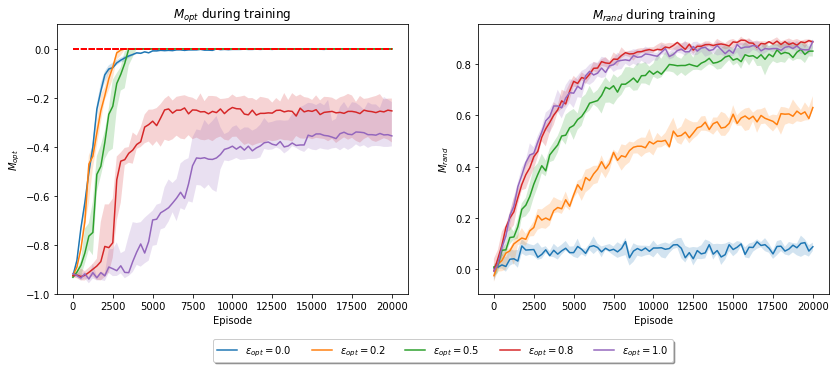

In [37]:
if load:
    output_folder = os.path.join(os.getcwd(), 'results')
    os.makedirs(output_folder, exist_ok=True)
    fname = output_folder + '/stats_dict_epsilon_opt_list.pkl'
    with open(fname, 'rb') as handle:
        stats_dict_eps_opt_list = pickle.load(handle)

plot_epsilon_opt = [0., 0.2, 0.5, 0.8, 1.]
plot_stats(stats_dict_eps_opt_list, plot_epsilon_opt, "epsilon_opt", "\epsilon_{opt}", save=save_figs, keys=['test_Mopt', 'test_Mrand'], perc=True)

##### Plot for all the experimented values

epsilon_opt = 0.0 : 	M_opt =  0.0 	M_rand =  0.101
epsilon_opt = 0.1 : 	M_opt =  0.0 	M_rand =  0.442
epsilon_opt = 0.2 : 	M_opt =  0.0 	M_rand =  0.612
epsilon_opt = 0.3 : 	M_opt =  0.0 	M_rand =  0.762
epsilon_opt = 0.4 : 	M_opt =  0.0 	M_rand =  0.8
epsilon_opt = 0.5 : 	M_opt =  0.0 	M_rand =  0.849
epsilon_opt = 0.6 : 	M_opt =  0.0 	M_rand =  0.873
epsilon_opt = 0.7 : 	M_opt =  -0.043 	M_rand =  0.892
epsilon_opt = 0.8 : 	M_opt =  -0.253 	M_rand =  0.874
epsilon_opt = 0.9 : 	M_opt =  -0.276 	M_rand =  0.895
epsilon_opt = 1.0 : 	M_opt =  -0.348 	M_rand =  0.877


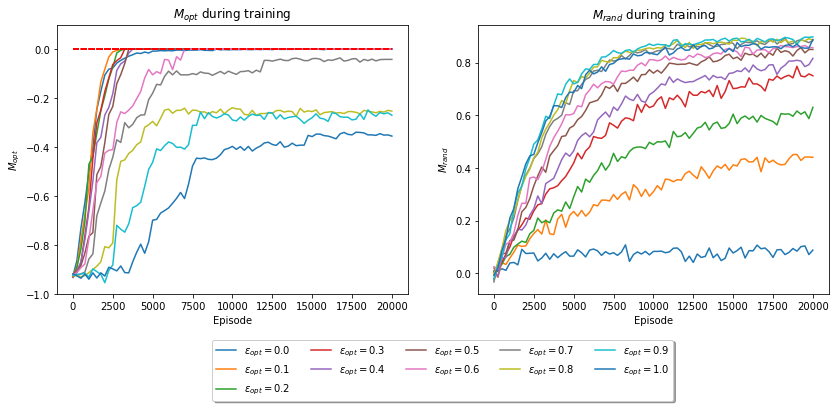

In [38]:
plot_stats(stats_dict_eps_opt_list, vec_epsilon_opt, "epsilon_opt", "\epsilon_{opt}", save=False, keys=['test_Mopt', 'test_Mrand'])

#### Question 5: Optimal values of $M_{\text{opt}}$ and $M_{\text{rand}}$

In [ ]:
np.random.seed(seed)
random.seed(seed)
# Setting hyperparams
n_star = 1
epsilon_min = 0.1
epsilon_max = 0.8
# Training
Q, stats = q_learning(env, num_episodes=20000, epsilon_exploration_rule=return_lambda_explor(epsilon_min, epsilon_max, n_star), verbose=False, epsilon_opt=0.5, against_opt=True)
# Measuring performance
m_opt = measure_performance(QPlayer(Q=Q), OptimalPlayer(epsilon=0.))
print("M_opt = ", m_opt)
m_rand = measure_performance(QPlayer(Q=Q), OptimalPlayer(epsilon=1.))
print("M_rand = ", m_rand)

### 2.2 Learning by self-practice

#### Question 7: Self-learning with constant rate of exploration $\epsilon$

In [8]:
epsilon_vec = [0.6]
print(epsilon_vec)
var_name = 'eps_self'
q_learning_params_list = []
for eps in epsilon_vec:
    params = {'env': env,
              'alpha': 0.01,
              'verbose': True,
              'num_episodes': num_episodes,
              'epsilon_exploration': eps,
              'test_freq': test_freq,
              'self_practice': True}
    q_learning_params_list.append(params)

[0.6]


In [ ]:
if train:
    stats_dict_eps_self_list = train_avg(var_name, epsilon_vec, q_learning_params_list, num_avg=1, save_stats=False)

************** RUN 1 OF 1 **************
------------- Training with eps_self = 0.6 -------------
Episode  0 :	M_opt =  -0.918 	M_rand =  -0.026
Episode  250 :	M_opt =  -0.934 	M_rand =  0.088
Episode  500 :	M_opt =  -0.986 	M_rand =  0.224
Episode  750 :	M_opt =  -0.98 	M_rand =  0.316
Episode  1000 :	M_opt =  -0.996 	M_rand =  0.388
Episode  1250 :	M_opt =  -0.976 	M_rand =  0.402
Episode  1500 :	M_opt =  -0.928 	M_rand =  0.464
Episode  1750 :	M_opt =  -0.934 	M_rand =  0.466
Episode  2000 :	M_opt =  -0.934 	M_rand =  0.58
Episode  2250 :	M_opt =  -0.938 	M_rand =  0.514
Episode  2500 :	M_opt =  -0.928 	M_rand =  0.6
Episode  2750 :	M_opt =  -0.938 	M_rand =  0.596
Episode  3000 :	M_opt =  -0.938 	M_rand =  0.576
Episode  3250 :	M_opt =  -0.934 	M_rand =  0.62
Episode  3500 :	M_opt =  -0.966 	M_rand =  0.634
Episode  3750 :	M_opt =  -0.966 	M_rand =  0.674
Episode  4000 :	M_opt =  -0.98 	M_rand =  0.712
Episode  4250 :	M_opt =  -0.6 	M_rand =  0.704
Episode  4500 :	M_opt =  -0.47 	M

In [ ]:
load = False
if load:
    output_folder = os.path.join(os.getcwd(), 'results')
    os.makedirs(output_folder, exist_ok=True)
    fname = output_folder + '/stats_dict_eps_self_list.pkl'
    with open(fname, 'rb') as handle:
        stats_dict_eps_self_list = pickle.load(handle)

epsilon_vec_plot = [0.6] # are these okay?
plot_stats(stats_dict_eps_self_list, epsilon_vec_plot, "epsilon_self", "\epsilon", save=save_figs, perc=True, keys=['test_Mopt', 'test_Mrand'])

##### Plot for all the experimented values

In [ ]:
plot_stats(stats_dict_eps_self_list, epsilon_vec, "epsilon_self", "\epsilon", save=False, keys=['test_Mopt', 'test_Mrand'])

#### Question 8: Decaying exploration rule for different values of $n^*$

In [4]:
epsilon_min = 0.1
epsilon_max = 0.8
vec_n_star = np.hstack((np.array([1, 100, 500, 750]), np.round(np.logspace(3, np.log10(40000), 16))))

In [5]:
num_splits = 2
chunks_list = np.array_split(vec_n_star, num_splits)
print(chunks_list)
qlearning_params_list = []
print('alpha = ', alpha)
for (idx, chunk) in enumerate(chunks_list):
    qlearning_params_list.append([])
    for n_star in chunk:
        params = {'env': env,
                  'num_episodes': num_episodes,
                  'epsilon_exploration_rule': return_lambda_explor(epsilon_min, epsilon_max, n_star),
                  'test_freq': test_freq,
                  'alpha': alpha,
                  'self_practice': True}
        qlearning_params_list[idx].append(params)

[array([1.000e+00, 1.000e+02, 5.000e+02, 7.500e+02, 1.000e+03, 1.279e+03,
       1.635e+03, 2.091e+03, 2.674e+03, 3.420e+03]), array([ 4373.,  5593.,  7152.,  9146., 11696., 14957., 19127., 24460.,
       31279., 40000.])]
alpha =  0.05


In [8]:
chunk_num = 1
np.random.seed(seed)
random.seed(seed)
if train:
    var_name = 'q_learning_n_star_self_' + str(chunk_num)
    chunk = chunks_list[chunk_num]
    stats_dict_nstar = train_avg(var_name, chunk, qlearning_params_list[chunk_num], num_avg=num_avg, save_stats=save_stats)

************** RUN 1 OF 10 **************
------------- Training with q_learning_n_star_self_1 = 4373.0 -------------
M_opt = -0.712
M_rand = 0.686
Training with q_learning_n_star_self_1 = 4373.0  took: 00h03m06s 


------------- Training with q_learning_n_star_self_1 = 5593.0 -------------
M_opt = -0.06
M_rand = 0.75
Training with q_learning_n_star_self_1 = 5593.0  took: 00h03m09s 


------------- Training with q_learning_n_star_self_1 = 7152.0 -------------
M_opt = -0.196
M_rand = 0.766
Training with q_learning_n_star_self_1 = 7152.0  took: 00h03m11s 


------------- Training with q_learning_n_star_self_1 = 9146.0 -------------
M_opt = -0.228
M_rand = 0.808
Training with q_learning_n_star_self_1 = 9146.0  took: 00h03m21s 


------------- Training with q_learning_n_star_self_1 = 11696.0 -------------
M_opt = 0.0
M_rand = 0.884
Training with q_learning_n_star_self_1 = 11696.0  took: 00h03m05s 


------------- Training with q_learning_n_star_self_1 = 14957.0 -------------
M_opt = -0.142

In [9]:
# Merge
stats_dicts = {}
if save_stats:
    stats_dict_nstar_list = []
    output_folder = os.path.join(os.getcwd(), 'results')
    os.makedirs(output_folder, exist_ok=True)
    for i in range(len(chunks_list)):
        fname = output_folder + '/stats_dict_q_learning_n_star_self_' + str(i) + '_list.pkl'
        with open(fname, 'rb') as handle:
            stats_dicts.update({i: pickle.load(handle)})
    for i in range(num_avg):
        to_append = {}
        for key in stats_dicts.keys():
            to_append.update(stats_dicts[key][i])
        stats_dict_nstar_list.append(to_append)
    fname = output_folder + '/stats_dict_q_learning_n_star_self_list.pkl'
    with open(fname, 'wb') as handle:
        pickle.dump(stats_dict_nstar_list, handle, protocol=pickle.HIGHEST_PROTOCOL)

n_star_self = 1.0 : 	M_opt =  -0.331 	M_rand =  0.6839999999999999
n_star_self = 1000.0 : 	M_opt =  -0.257 	M_rand =  0.688
n_star_self = 9146.0 : 	M_opt =  -0.11 	M_rand =  0.838
n_star_self = 24460.0 : 	M_opt =  -0.07100000000000001 	M_rand =  0.871
n_star_self = 40000.0 : 	M_opt =  -0.118 	M_rand =  0.914


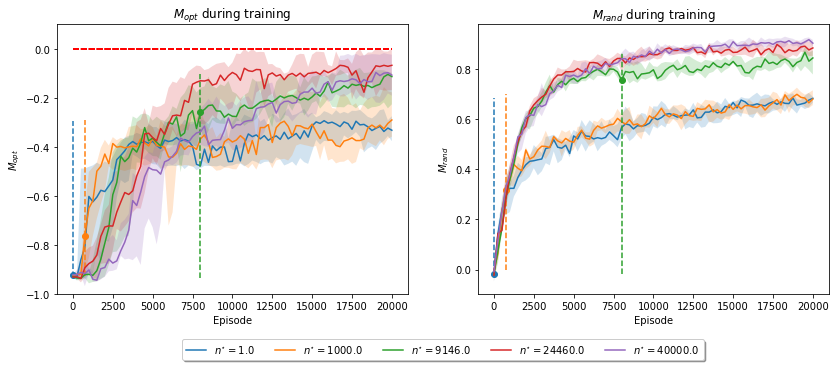

In [25]:
if load:
    output_folder = os.path.join(os.getcwd(), 'results')
    os.makedirs(output_folder, exist_ok=True)
    fname = output_folder + '/stats_dict_q_learning_n_star_self_list.pkl'
    with open(fname, 'rb') as handle:
        stats_dict_nstar_list = pickle.load(handle)

plot_n_star = [1., 1000., 9146., 24460., 40000.]
plot_stats(stats_dict_nstar_list, plot_n_star, 'n_star_self', "n^{\star}", decaying_exploration=True, save=save_figs, perc=True, keys=['test_Mopt', 'test_Mrand'])

##### Plot for all the experimented values

n_star_self = 1.0 : 	M_opt =  -0.33640000000000003 	M_rand =  0.6788
n_star_self = 100.0 : 	M_opt =  -0.30399999999999994 	M_rand =  0.6802
n_star_self = 500.0 : 	M_opt =  -0.29799999999999993 	M_rand =  0.645
n_star_self = 750.0 : 	M_opt =  -0.3538 	M_rand =  0.6502000000000001
n_star_self = 1000.0 : 	M_opt =  -0.2858 	M_rand =  0.6860000000000002
n_star_self = 1279.0 : 	M_opt =  -0.2522 	M_rand =  0.7044
n_star_self = 1635.0 : 	M_opt =  -0.2542 	M_rand =  0.7174
n_star_self = 2091.0 : 	M_opt =  -0.31179999999999997 	M_rand =  0.6874
n_star_self = 2674.0 : 	M_opt =  -0.32220000000000004 	M_rand =  0.71
n_star_self = 3420.0 : 	M_opt =  -0.3438 	M_rand =  0.6903999999999999
n_star_self = 4373.0 : 	M_opt =  -0.35819999999999996 	M_rand =  0.7332000000000001
n_star_self = 5593.0 : 	M_opt =  -0.21760000000000002 	M_rand =  0.767
n_star_self = 7152.0 : 	M_opt =  -0.20579999999999998 	M_rand =  0.7976
n_star_self = 9146.0 : 	M_opt =  -0.15400000000000003 	M_rand =  0.8408
n_star_self = 11696

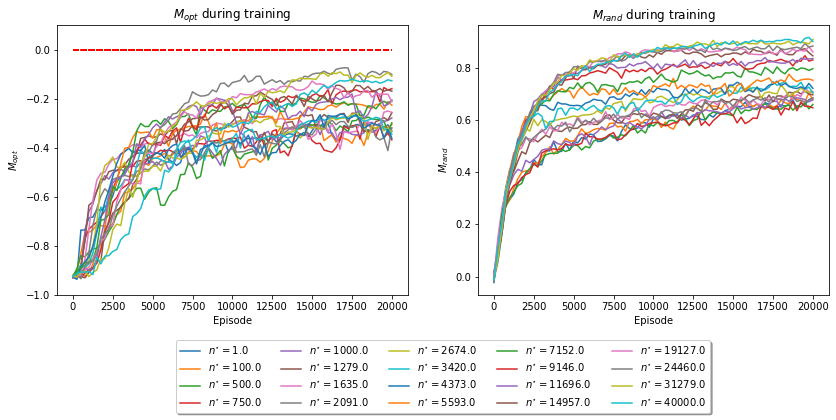

In [18]:
plot_stats(stats_dict_nstar_list, vec_n_star, 'n_star_self', "n^{\star}", save=False, keys=['test_Mopt', 'test_Mrand'])

#### Optimal values of $M_{\text{opt}}$ and $M_{\text{rand}}$

In [31]:
np.random.seed(seed)
random.seed(seed)
# Setting hyperparams
# Training
n_star = 24460
epsilon_exploration_rule = return_lambda_explor(epsilon_min, epsilon_max, n_star)
m_opt_vec = []
m_rand_vec = []
for i in range(10):
    Q, stats = q_learning(env, epsilon_exploration_rule = epsilon_exploration_rule, self_practice=True)
    # Measuring performance
    m_opt = measure_performance(QPlayer(Q=Q), OptimalPlayer(epsilon=0.))
    m_rand = measure_performance(QPlayer(Q=Q), OptimalPlayer(epsilon=1.))
    m_opt_vec.append(m_opt)
    m_rand_vec.append(m_rand)
    print("Run", i+1, ": M_opt = ", np.round(m_opt, decimals=3), "\t M_rand = ", np.round(m_rand, decimals=3))

print('*********************', ' AVERAGE STATS ', '*********************')
print("Median:\tM_opt = ", np.round(np.median(m_opt_vec),decimals=3), "\t M_rand = ", np.round(np.median(m_rand_vec),decimals=3))
print("25th quantile:\tM_opt = ", np.round(np.percentile(m_opt_vec, q=25),decimals=3), "\t M_rand = ", np.round(np.percentile(m_rand_vec, q=25),decimals=3))
print("75th quantile:\tM_opt = ", np.round(np.percentile(m_opt_vec, q=75),decimals=3), "\t M_rand = ", np.round(np.percentile(m_rand_vec, q=75),decimals=3))

Run 1 : M_opt =  0.0 	 M_rand =  0.774
Run 2 : M_opt =  0.0 	 M_rand =  0.884
Run 3 : M_opt =  -0.282 	 M_rand =  0.84
Run 4 : M_opt =  -0.664 	 M_rand =  0.822
Run 5 : M_opt =  -0.274 	 M_rand =  0.88
Run 6 : M_opt =  -0.188 	 M_rand =  0.866
Run 7 : M_opt =  0.0 	 M_rand =  0.928
Run 8 : M_opt =  -0.04 	 M_rand =  0.868
Run 9 : M_opt =  0.0 	 M_rand =  0.922
Run 10 : M_opt =  -0.102 	 M_rand =  0.89
*********************  AVERAGE STATS  *********************
Median:	M_opt =  -0.071 	 M_rand =  -0.071
25th quantile:	M_opt =  -0.252 	 M_rand =  0.846
75th quantile:	M_opt =  0.0 	 M_rand =  0.889


In [27]:
print('*********************', ' AVERAGE STATS ', '*********************')
print("Median:\tM_opt = ", np.round(np.median(m_opt_vec),decimals=3), "\t M_rand = ", np.round(np.median(m_rand_vec),decimals=3))
print("25th quantile:\tM_opt = ", np.round(np.percentile(m_opt_vec, q=25),decimals=3), "\t M_rand = ", np.round(np.percentile(m_rand_vec, q=25),decimals=3))
print("75th quantile:\tM_opt = ", np.round(np.percentile(m_opt_vec, q=75),decimals=3), "\t M_rand = ", np.round(np.percentile(m_rand_vec, q=75),decimals=3))

*********************  AVERAGE STATS  *********************
Median:	M_opt =  0.0 	 M_rand =  0.928
25th quantile:	M_opt =  -0.086 	 M_rand =  0.898
75th quantile:	M_opt =  0.0 	 M_rand =  0.936


In [ ]:
epsilon_exploration = 0.2
stats_dict_list = []
for i in range(num_avg):
    print('************** RUN', i+1, 'OF', num_avg, '**************')
    stats_dict = {}
    start = time.time()
    Q, stats = q_learning(env, epsilon_exploration=epsilon_exploration, num_episodes=num_episodes, 
                          test_freq=250, verbose=True, self_practice=True)
    M_opt = measure_performance(QPlayer(Q=Q), OptimalPlayer(epsilon=0.))
    M_rand = measure_performance(QPlayer(Q=Q), OptimalPlayer(epsilon=1.))
    print("M_opt =", M_opt)
    print("M_rand =", M_rand)
    stats_dict.update({epsilon_exploration: (stats, M_opt, M_rand)})
    stats_dict_list.append(stats_dict)
    print('RUN', i+1, 'took', np.round(time.time()-start,decimals=1), 'seconds')

In [ ]:
plot_stats(stats_dict_list, [epsilon_exploration], 'epsilon_exploration_Q7', '\epsilon', save=save_figs, keys = ['test_Mopt', 'test_Mrand'], perc=True)

#### Question 10: Heatmaps of the Q-values in 3 significant states

In [ ]:
# Parametri ottimali di Q
epsilon_min = 0.1
epsilon_max = 0.8
n_star = 20000
epsilon_exploration_rule = return_lambda_explor(epsilon_min, epsilon_max, n_star)
Q, stats = q_learning(env, epsilon_exploration_rule=epsilon_exploration_rule, num_episodes=20000, verbose=True, self_practice=True)

In [ ]:
grids = [[1., 0., 0., -1., 1., 0., 0., -1., 0.], [-1., 0., 0., 1., -1., 0., 0., 1., 0.], [1., -1., 0., 0., 0., 0., 0., 0., 0.]]
heatmaps_subplots(grids, Q, save=save_figs)

## Deep Q-Learning